# Customer Churn in a fictitious bank (binary classification)

#### Predict the customer churn in a fictitious bank using Artificial Neural Network (ANN)

###### Import packages

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
print("All packages are imported.")

Using TensorFlow backend.


All packages are imported.


#### Helper functions

In [3]:
def read_from_csv(path):
    """
    load data from csv file to a dataframe 
    """
    try:
        df = pd.read_csv(path)
    except IOError:
        raise
    return df

def drop_columns(data, columns):
    """
    Drop one or more columns from existing dataframe
    """
    return data.drop(columns, axis=1)

def dummy_columns(data, columns):
    """
    create dummy columns for categorical values
    """
    for col in columns:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
        data = data.drop(col, axis=1)
    return data

def encode_label(data, column_index):
    """
    encode categorical variables
    """
    le = LabelEncoder()
    data[:, column_index] = le.fit_transform(data[:, column_index])
    return data

def normalize_data(data):
    """
    normalize data for a column or list of columns
    """
    stdScalar = StandardScaler()
    data = stdScalar.fit_transform(data)
    return data

def one_hot_encoding(data, cols):
    """
    one hot encoding of categorical variables
    """
    onehotenc = OneHotEncoder(categorical_features=cols)
    data = onehotenc.fit_transform(data).toarray()
    return data

def split_train_test(data_x, data_y, fraction):
    """
    split data into train and test set
    """
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=float(fraction), random_state=0)
    return x_train, x_test, y_train, y_test

#### Load dataset

In [4]:
path = "./customer_churn_dataset.csv"
churn_data = read_from_csv(path)

#### Preprocess Data

In [5]:
y = churn_data['Exited'].values

In [6]:
# Drop unnecessary columns
cols = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
churn_data = drop_columns(churn_data, cols)

In [7]:
# convert the dataframe into numpy array
churn_data = churn_data.values

In [8]:
# Encode Geography & Gender
churn_data = encode_label(churn_data, 1)
churn_data = encode_label(churn_data, 2)

In [9]:
# apply onehot encoding to the categorical variable Geography and also drop a dummy column to avoid dummy trap
cat_cols = [1]
churn_data = one_hot_encoding(churn_data, cat_cols)
churn_data = churn_data[:, 1:]

In [10]:
# train test split
x_train, x_test, y_train, y_test = split_train_test(churn_data, y, 0.2)

In [11]:
# Normalize data
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

#### Build ANN model

In [12]:
model = Sequential()

# first hidden layer
model.add(Dense(10, activation='relu', input_shape=(11,)))
model.add(Dropout(0.25))
# second hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


#### Compile model

In [14]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.adam(), metrics=['accuracy'])

#### Train the model

In [15]:
train = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
7200/7200 [==============================] - 0s 35us/step - loss: 0.5798 - acc: 0.7818 - val_loss: 0.5417 - val_acc: 0.7950
Epoch 2/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.5492 - acc: 0.7910 - val_loss: 0.5094 - val_acc: 0.7950
Epoch 3/200
7200/7200 [==============================] - 0s 23us/step - loss: 0.5285 - acc: 0.7936 - val_loss: 0.4846 - val_acc: 0.7950
Epoch 4/200
7200/7200 [==============================] - 0s 24us/step - loss: 0.5107 - acc: 0.7949 - val_loss: 0.4679 - val_acc: 0.7950
Epoch 5/200
7200/7200 [==============================] - 0s 24us/step - loss: 0.5004 - acc: 0.7961 - val_loss: 0.4543 - val_acc: 0.7950
Epoch 6/200
7200/7200 [==============================] - 0s 23us/step - loss: 0.4902 - acc: 0.7971 - val_loss: 0.4441 - val_acc: 0.7987
Epoch 7/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.4805 - acc: 0.7979 - val_loss: 0.4343 - val_acc: 0.8000
E

Epoch 120/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.3745 - acc: 0.8429 - val_loss: 0.3331 - val_acc: 0.8600
Epoch 121/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3788 - acc: 0.8422 - val_loss: 0.3340 - val_acc: 0.8625
Epoch 122/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.3837 - acc: 0.8399 - val_loss: 0.3349 - val_acc: 0.8625
Epoch 123/200
7200/7200 [==============================] - 0s 23us/step - loss: 0.3794 - acc: 0.8414 - val_loss: 0.3347 - val_acc: 0.8600
Epoch 124/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3751 - acc: 0.8428 - val_loss: 0.3335 - val_acc: 0.8600
Epoch 125/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3779 - acc: 0.8439 - val_loss: 0.3343 - val_acc: 0.8612
Epoch 126/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3787 - acc: 0.8397 - val_loss: 0.3343 - val_acc: 0.8600
Epoch 127/200
7200/7200 [=========

#### Show training loss and accuracy in graphs

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


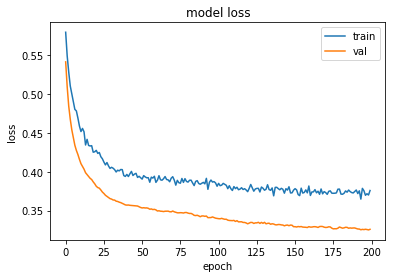

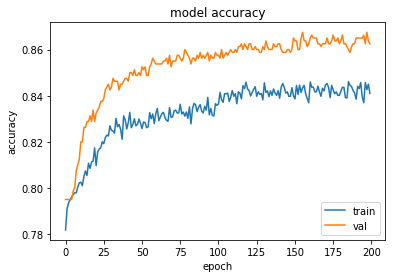

In [16]:
# list all data held in history object
print(train.history.keys())

# plot data for 'loss'
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# plot data for 'accuracy'
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

#### Predict customer churn on test data

In [17]:
y_pred = model.predict(x_test, verbose=1)

2000/2000 [==============================] - 0s 23us/step


In [18]:
y_pred = (y_pred > 0.5)

#### Calculate Confusion matrix & test accuracy

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
# testing accuracy
acc = (cm[0][0] + cm[1][1])/y_test.shape[0] * 100
print("Final test accuracy: {:.3f}%".format(acc))

Final test accuracy: 86.850%


#### K-fold cross validation to confirm the variance and accuracy

In [21]:
# build the classifier
def build_classifier():
    model_k = Sequential()

    # first hidden layer
    model_k.add(Dense(10, activation='relu', input_shape=(11,)))
    model.add(Dropout(0.25))
    
    # second hidden layer
    model_k.add(Dense(10, activation='relu'))
    model.add(Dropout(0.25))
    # output layer
    model_k.add(Dense(1, activation='sigmoid'))
    
    # compile model
    
    model_k.compile(loss='binary_crossentropy', optimizer=optimizers.adam(), metrics=['accuracy'])

    return model_k

In [22]:
classifier = KerasClassifier(build_fn=build_classifier, batch_size=128, epochs=200)
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10, n_jobs=1, verbose=1)

Epoch 1/200
7200/7200 [==============================] - 0s 32us/step - loss: 0.7076 - acc: 0.5432
Epoch 2/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.5841 - acc: 0.7525
Epoch 3/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.5240 - acc: 0.7928
Epoch 4/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4888 - acc: 0.7978
Epoch 5/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.4675 - acc: 0.7978
Epoch 6/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.4539 - acc: 0.7997
Epoch 7/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4455 - acc: 0.8038
Epoch 8/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4394 - acc: 0.8056
Epoch 9/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.4352 - acc: 0.8060
Epoch 10/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4317 - acc: 0.8076
Epoch 11/

7200/7200 [==============================] - 0s 20us/step - loss: 0.3318 - acc: 0.8644
Epoch 84/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.3316 - acc: 0.8656
Epoch 85/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3315 - acc: 0.8658
Epoch 86/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3314 - acc: 0.8647
Epoch 87/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3314 - acc: 0.8651
Epoch 88/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3309 - acc: 0.8640
Epoch 89/200
7200/7200 [==============================] - 0s 25us/step - loss: 0.3309 - acc: 0.8650
Epoch 90/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3305 - acc: 0.8649
Epoch 91/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3305 - acc: 0.8636
Epoch 92/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3302 - acc: 0.8643
Epoch 93/200


7200/7200 [==============================] - 0s 16us/step - loss: 0.3332 - acc: 0.8631
Epoch 46/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3331 - acc: 0.8625
Epoch 47/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3329 - acc: 0.8629
Epoch 48/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3325 - acc: 0.8647
Epoch 49/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3326 - acc: 0.8643
Epoch 50/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3322 - acc: 0.8636
Epoch 51/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3321 - acc: 0.8654
Epoch 52/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3321 - acc: 0.8643
Epoch 53/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3313 - acc: 0.8638
Epoch 54/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3312 - acc: 0.8636
Epoch 55/200


7200/7200 [==============================] - 0s 15us/step - loss: 0.4588 - acc: 0.7965
Epoch 7/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4494 - acc: 0.7996
Epoch 8/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.4403 - acc: 0.8029
Epoch 9/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.4314 - acc: 0.8128
Epoch 10/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.4230 - acc: 0.8176
Epoch 11/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.4160 - acc: 0.8231
Epoch 12/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.4111 - acc: 0.8237
Epoch 13/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.4076 - acc: 0.8254
Epoch 14/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.4046 - acc: 0.8265
Epoch 15/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4020 - acc: 0.8282
Epoch 16/200
720

7200/7200 [==============================] - 0s 17us/step - loss: 0.3324 - acc: 0.8613
Epoch 89/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3318 - acc: 0.8628
Epoch 90/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3323 - acc: 0.8592
Epoch 91/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3318 - acc: 0.8610
Epoch 92/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3316 - acc: 0.8615
Epoch 93/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3315 - acc: 0.8619
Epoch 94/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3315 - acc: 0.8610
Epoch 95/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3314 - acc: 0.8600
Epoch 96/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3311 - acc: 0.8622
Epoch 97/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3313 - acc: 0.8610
Epoch 98/200


7200/7200 [==============================] - 0s 16us/step - loss: 0.3321 - acc: 0.8660
Epoch 51/200
7200/7200 [==============================] - 0s 15us/step - loss: 0.3318 - acc: 0.8638
Epoch 52/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3317 - acc: 0.8660
Epoch 53/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3314 - acc: 0.8632
Epoch 54/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3309 - acc: 0.8644
Epoch 55/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3316 - acc: 0.8663
Epoch 56/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3305 - acc: 0.8644
Epoch 57/200
7200/7200 [==============================] - 0s 15us/step - loss: 0.3303 - acc: 0.8646
Epoch 58/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3302 - acc: 0.8644
Epoch 59/200
7200/7200 [==============================] - 0s 15us/step - loss: 0.3302 - acc: 0.8656
Epoch 60/200


7200/7200 [==============================] - 0s 16us/step - loss: 0.4086 - acc: 0.8226
Epoch 12/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.4026 - acc: 0.8275
Epoch 13/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3960 - acc: 0.8331
Epoch 14/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3888 - acc: 0.8385
Epoch 15/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3823 - acc: 0.8418
Epoch 16/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3763 - acc: 0.8447
Epoch 17/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3717 - acc: 0.8450
Epoch 18/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3677 - acc: 0.8457
Epoch 19/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3650 - acc: 0.8478
Epoch 20/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3626 - acc: 0.8481
Epoch 21/200


7200/7200 [==============================] - 0s 16us/step - loss: 0.3353 - acc: 0.8614
Epoch 94/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3353 - acc: 0.8597
Epoch 95/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3352 - acc: 0.8600
Epoch 96/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3350 - acc: 0.8599
Epoch 97/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3356 - acc: 0.8614
Epoch 98/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3350 - acc: 0.8608
Epoch 99/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3348 - acc: 0.8611
Epoch 100/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3347 - acc: 0.8603
Epoch 101/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3345 - acc: 0.8608
Epoch 102/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3348 - acc: 0.8610
Epoch 103/

7200/7200 [==============================] - 0s 20us/step - loss: 0.3375 - acc: 0.8639
Epoch 56/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.3370 - acc: 0.8640
Epoch 57/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3372 - acc: 0.8638
Epoch 58/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3367 - acc: 0.8643
Epoch 59/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3367 - acc: 0.8631
Epoch 60/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3364 - acc: 0.8635
Epoch 61/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3361 - acc: 0.8656
Epoch 62/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3363 - acc: 0.8643
Epoch 63/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3360 - acc: 0.8657
Epoch 64/200
7200/7200 [==============================] - 0s 22us/step - loss: 0.3356 - acc: 0.8643
Epoch 65/200


7200/7200 [==============================] - 0s 17us/step - loss: 0.3838 - acc: 0.8410
Epoch 17/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3789 - acc: 0.8429
Epoch 18/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3743 - acc: 0.8446
Epoch 19/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3708 - acc: 0.8464
Epoch 20/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3670 - acc: 0.8475
Epoch 21/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3638 - acc: 0.8494
Epoch 22/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3615 - acc: 0.8497
Epoch 23/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3593 - acc: 0.8494
Epoch 24/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3571 - acc: 0.8517
Epoch 25/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3557 - acc: 0.8522
Epoch 26/200


7200/7200 [==============================] - 0s 17us/step - loss: 0.3290 - acc: 0.8631
Epoch 99/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3289 - acc: 0.8626
Epoch 100/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3285 - acc: 0.8625
Epoch 101/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3289 - acc: 0.8631
Epoch 102/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3285 - acc: 0.8639
Epoch 103/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3283 - acc: 0.8636
Epoch 104/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3282 - acc: 0.8621
Epoch 105/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3281 - acc: 0.8629
Epoch 106/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3283 - acc: 0.8632
Epoch 107/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3281 - acc: 0.8639
Epoch

7200/7200 [==============================] - 0s 21us/step - loss: 0.3313 - acc: 0.8629
Epoch 61/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.3309 - acc: 0.8638
Epoch 62/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3304 - acc: 0.8640
Epoch 63/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3307 - acc: 0.8624
Epoch 64/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3301 - acc: 0.8633
Epoch 65/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3299 - acc: 0.8640
Epoch 66/200
7200/7200 [==============================] - 0s 21us/step - loss: 0.3297 - acc: 0.8636
Epoch 67/200
7200/7200 [==============================] - 0s 24us/step - loss: 0.3295 - acc: 0.8650
Epoch 68/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3293 - acc: 0.8638
Epoch 69/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3289 - acc: 0.8642
Epoch 70/200


Epoch 22/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3695 - acc: 0.8521
Epoch 23/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3643 - acc: 0.8526
Epoch 24/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3600 - acc: 0.8543
Epoch 25/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3565 - acc: 0.8564
Epoch 26/200
7200/7200 [==============================] - 0s 20us/step - loss: 0.3536 - acc: 0.8581
Epoch 27/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3514 - acc: 0.8572
Epoch 28/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3492 - acc: 0.8596
Epoch 29/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3476 - acc: 0.8596
Epoch 30/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3462 - acc: 0.8608
Epoch 31/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3449 - acc: 0.8600


7200/7200 [==============================] - 0s 17us/step - loss: 0.3225 - acc: 0.8649
Epoch 185/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3220 - acc: 0.8661
Epoch 186/200
7200/7200 [==============================] - 0s 19us/step - loss: 0.3228 - acc: 0.8644
Epoch 187/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3225 - acc: 0.8658
Epoch 188/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3220 - acc: 0.8658
Epoch 189/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3220 - acc: 0.8668
Epoch 190/200
7200/7200 [==============================] - 0s 18us/step - loss: 0.3220 - acc: 0.8654
Epoch 191/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3220 - acc: 0.8665
Epoch 192/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3219 - acc: 0.8658
Epoch 193/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3220 - acc: 0.8669
Epoc

7200/7200 [==============================] - 0s 16us/step - loss: 0.3291 - acc: 0.8650
Epoch 147/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3287 - acc: 0.8646
Epoch 148/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3290 - acc: 0.8642
Epoch 149/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3286 - acc: 0.8658
Epoch 150/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3285 - acc: 0.8650
Epoch 151/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3285 - acc: 0.8654
Epoch 152/200
7200/7200 [==============================] - 0s 17us/step - loss: 0.3286 - acc: 0.8653
Epoch 153/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3286 - acc: 0.8651
Epoch 154/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3286 - acc: 0.8658
Epoch 155/200
7200/7200 [==============================] - 0s 16us/step - loss: 0.3281 - acc: 0.8672
Epoc

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.2min finished


In [23]:
mean_acc = accuracies.mean()
variance_acc = accuracies.std()
print("Mean Accuracy of K-fold cross validation: {:.5f}\nAccuracy variance of K-fold cross validation: {:.3f}".format(mean_acc, variance_acc))

Mean Accuracy of K-fold cross validation: 0.85938
Accuracy variance of K-fold cross validation: 0.013
